<a href="https://colab.research.google.com/github/tlyonsSETU/Applied-Calculus/blob/main/Python%20Workbook%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name:
### Student Number:

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
import matplotlib.style as style # Change the plot style used for graphs
style.use('seaborn')

In [3]:
# The following libraries are for creating interactive plots
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Python Workbook 4 - Symbolic Differentiation

* In this workbook we will cover the following topics:

  1. The meaning of the derivative.
  2. Symbolic functions and their plots.
  3. Derivatives of symbolic functions and their plots.
  4. Rules of derivatives checked with sybolic differentiation.


---
---

# Section 1 - What is a derivative?

* The derivative of a function $f(x)$ tells us how quickly that function changes as we move away from some value of $x$.


* If we draw a graph of $f(x)$ it tells us how quiuckly the $y$-coordinate of $f(x)$ changes compared to the corresponding change in the $x$-coordinate.


* The derivative of $f(x)$ is __defined__ as:
$$
\frac{df}{dx} = \lim_{h \to 0}\frac{f(x+h) - f(x)}{h}.
$$

* The __numerator__ of this expression is
$$
f(x+h) - f(x)
$$
and it tells us the change in the $y$-coordinate of the graph between $x$ and $x+h$.

* The difference of these two $x$-coordinates (inputs) is
$$
(x+h) - x = h, 
$$
which is the __denominator__ of the expression.


* Now letting $\lim_{h\to 0 }$ just means letting the input $x+h$ get closer and closer to the initial input $x$. 

## Example 1

* The graph of the function
$$
f(x) = x^3
$$
is shown in the interactive plot below.


* We know from our tables that this function should have derivative
$$
\frac{df}{dx} = 3x^2,
$$
and so the derivative of $f$ at the point $x=1$ is
$$
\frac{df}{dx}(1) = 3(1)^2 = 3.
$$


* The graph shows the line connecting the points
$$
(x,f(x)),\quad (x+h,f(x+h))
$$
on the graph of this function. 


* The point where the derivative is calculated is the input $x$.

* The coordinate difference is $h$.

__First:__ The function $f(x)$ is __def__ined in the cell below: 

In [4]:
def f(x):
  return x**3

* Now we create an interactive plot with __2 sliders__, one for $x$ and one for $h$.

In [7]:
#@title What is a Deriviative 
def IP1(h=1,x=1):
    plt.figure(figsize=(12,9))
    
    plt.axvline(color='k',lw=0.75) # Plot the y-axis
    plt.axhline(color='k',lw=0.5) # Plot the x-axis

    t=np.linspace(-1,2.5,201) # An iterval used to plot the graph of f(x)
    plt.plot(t, f(t),color='darkslategray') # The graph of f(t) for -1<t<2

    plt.plot([x,x+h],[f(x),f(x+h)],'or') # Plot red dots at the x-coordinates [x,x+h] and y-coordinates [f(x), f(x+h)] 
    plt.plot([x,x+h],[f(x),f(x+h)],ls='--') # Plot the line between the x-coordinates [x,x+h] and y-coordinates [f(x), f(x+h)]
    plt.plot([x+h,x+h],[f(x),f(x+h)],ls='--',label='$f(x+h)-f(x)$',color='green') # Plot a vertical line to show the y-change f(x+h)-f(x)
    plt.plot([x,x+h],[f(x),f(x)],ls='--',label='$h$',color='orange') # Plot a horizontal line to show the horizontal change h

    dx=h
    dy=f(x+h)-f(x)

    plt.text(-1,7,'$\\frac{f(x+h)-f(x)}{h} \\approx % s$' % (dy/dx),size=14 ) # Show the value of the ratio [f(f+h)-f(x)]/h
    plt.legend(loc='lower right',fontsize=14) # Plot the legend to show what each line represents

    plt.show() # Show the plot

Plot = interactive(IP1, h=(1E-10,1,0.001),x=(-0.5,1.5)) # Create an interactive plot environment with sliders for h and x
output = Plot.children[-1] 
output.layout.height = '6.3in'
Plot

interactive(children=(FloatSlider(value=1.0, description='h', max=1.0, min=1e-10, step=0.001), FloatSlider(val…

* If you adjust the __h__ slider down towards zero, then you can see that the ratio
$$
\frac{f(1+h)-f(1)}{h}
$$
approaches the value $3$, as we expect from our __Table of Derivatives__


* You can also adjust the __a__ slider to calcuate the derivative $\frac{df}{dx}=3x^2$ at various inputs for $x$.


* For example, if we adjust the __x__-slider to $x=0.5$, we see that the derivative $\frac{df}{dx}=3x^2$ approaches the value __0.75__  

---

## __Exercise 1__

(a) Define a new Python function to represent
$$
g(x) = x^2-x.
$$

(b) __Copy & Paste__ the code from the interavitve plot above into the code cell below.


(c) Adjust this code to plot the graph of __g(x)__ on the interval $ x\in[-1,3].$ 


(d) __Adjust__ the sliders __h__ and __x__ to estimate the derivative of $\frac{dg}{dx}$ at __x=0.2__ and __x=1.25__. 

(c) What is the value of $\frac{dg}{dx}$ at $x=1.2$ and $x=2.25$.

---
---

# Section 2 - Symbolic Functions & Plots

* While the definition of the derivative above is a useful way to see what the derivative is, it is not very convenitent when you want to carry our calculations.

* For this purpose we use __tables of derivative__ to calculate derivatives by had.

* In python there is a similar procedure we can use to calculate derivatives, using the __SymPy__ library, which stands for __Sym__bolic __Py__thon.

* This library is imported below as __sym:__


### Importing SymPy

In [ ]:
import sympy as sym

## Example 2.1 - Symbolic Variables & Functions

* To define functions like $f(x)=x^3$ we first need to define a __symbolic variable__ to represent $x$ as follows: 

In [ ]:
x = sym.symbols('x', real = True)
x

x

* This arguments of __sym.symbols()__ mean the following
  * __real=True__ - This means __x__ should be interpreted as a real valued input i.e. not complex
  * 'x' - Print x when __x__ is called in a code cell

* The string 'x' can be changed to any text you wish, for example the python variable __Q__ below will print the string 'a-string' when called

In [ ]:
Q=sym.symbols('a-string')
Q

a-string

### Defining a symbolic function

* To define the symbolic function $f(x)=x^3$ we can now just set: 

In [ ]:
f=x**3
f

x**3

* As you can see, it is very straight forward as there is no need to use __def()__, although you still can if you wish!

## __Exercise 2.1__ 

* Use __sym.sympy()__ to define a python variable __t__ which will display the string $t$

* Now define the symbolic function $r = t^2-4t +1$

---

## Example 2.2 - Lambdify functions and plotting

* The symbolic library does not work very well with the numpy library, since they are desigened to do two very different types of calculation.


* However, we can always use the function __sym.lamdify()__ to convert a sympy function to a numpy function, which works very well with matplotlib for plotting.


* In the cell below we define the sympy function
$$
p(x) = \frac{e^x}{1+x^2}\sin(2x)
$$

In [ ]:
p =sym.exp(x)/(1+x**2)*sym.sin(2*x)
p

exp(x)*sin(2*x)/(x**2 + 1)

### __Important:__ 

* The symolic functions $\sin()$, $\cos()$ and $\tan()$ are called from the sympy library by placing __sym.__ before the corresponding function name, similar to the numpy versions of these functions

* Similary, the functions $\sqrt{( )}$, $e^{( )}$ and $\ln( )$ are called using __sym.sqrt()__, __sym.exp()__, __sym.log()__

### Lambdify the function

* The next cell __lambdifies__ this function, so that it becomes compatible with the numpy and matplotlib libraries.

* From now on we will use __lower case letters__ for __symbolic functions__ and __varibales__

* We will use __upper case letters__ for __numerical functions__ and __variables__, just so things are easier to follow in the code!!

In [ ]:
P = sym.lambdify(x, p, 'numpy')

#### SYNTAX of lambdify

* The argument __x__ is used since $x$ was the symbolic variable used to define the symbolic __p__.

* __p__ is the symbolic function we want to lambdify

* 'numpy' is the type of function we want to lambdify to.

* __P__ is the name we have chosen to give to the numpy version of __p__

### Plotting the lambdified function

* We can now plot the numpy function __P__ using the usual matplotlib function.

* We will plot the function over the interval __X__$\in[-2,2]$

* Again, we will use capital letters for numpy intervals like __X__

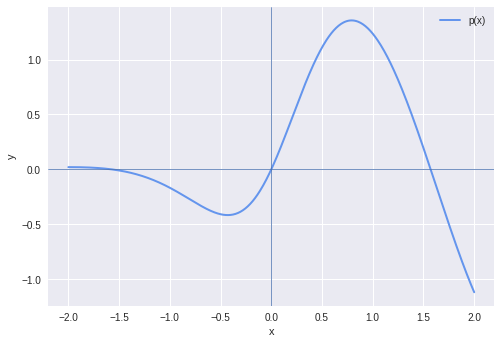

In [ ]:
X=np.linspace(-2,2,501)

plt.plot(X,P(X),lw=2,c='cornflowerblue',label='p(x)')

plt.axhline(y=0,lw=0.75)
plt.axvline(x=0,lw=0.75)

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

---
## __Exercise 2.2__

(a) Define the symbolic function 
$$
q = \frac{\cos(t)}{1+e^{t}}.
$$
__NOTE:__ The symbolic variable $t$ should be already defined from __Exercise 2.1__


(b) Use __sym.lambdify()__ to define __Q__ the numpy version of __q__ 

(c) Use __np.linspace()__ to define the interval __T = [-5,5]__ with __501__ points, and plot __Q__ along this interval.

---
---

# Section 3 - Symbolic Derivatives & Plots


* Now that we know how to define and plot symbolic functions, we can use the __sym.diff()__ function to calcualte the __Derivatives__ of symbolic functions.


* We can then use the techniques of Section 2 to plot these functions and their derivatives also.

## Example 3

* Use the __sym.diff()__ function to calculate the __first__ and __second__ derivatives of the function __p__ defined in __Example 2.2.__


* First, to remind ourselves we call the symbolic function __p__ again in the cell below.

In [ ]:
p

exp(x)*sin(2*x)/(x**2 + 1)

* The __first derivative__ is found using:

In [ ]:
dp = sym.diff(p, (x,1))
dp

-2*x*exp(x)*sin(2*x)/(x**2 + 1)**2 + exp(x)*sin(2*x)/(x**2 + 1) + 2*exp(x)*cos(2*x)/(x**2 + 1)

__SYNTAX of sym.diff()__

* The function __sym.diff()__ takes the input __p__ to indicate the function we want to differentiate.

* The second argument is __(x,1):__ This indicates we want to differentiate with respect to the variable __x__ since __p__ was originally defined in terms of __x__, while __1__ indicates we want the __first derivative__

* The __second derivative__ is similarly given by

In [ ]:
d2p = sym.diff(p,(x,2))
d2p

(-4*x*sin(2*x)/(x**2 + 1) - 8*x*cos(2*x)/(x**2 + 1) - 3*sin(2*x) + 4*cos(2*x) + 2*(4*x**2/(x**2 + 1) - 1)*sin(2*x)/(x**2 + 1))*exp(x)/(x**2 + 1)

## Lambidfication

* Use __sym.lambdify()__ to lambdify the first and second derivatives of __p__, we will call these lambdifed versions __DP__ and __D2P__.

In [ ]:
DP=sym.lambdify(x,dp,'numpy')
D2P=sym.lambdify(x,d2p,'numpy')

* Now plot the numpy functions __P__, __DP__ and __D2P__ along the interval __X=[-2,2]__ defined earlier.

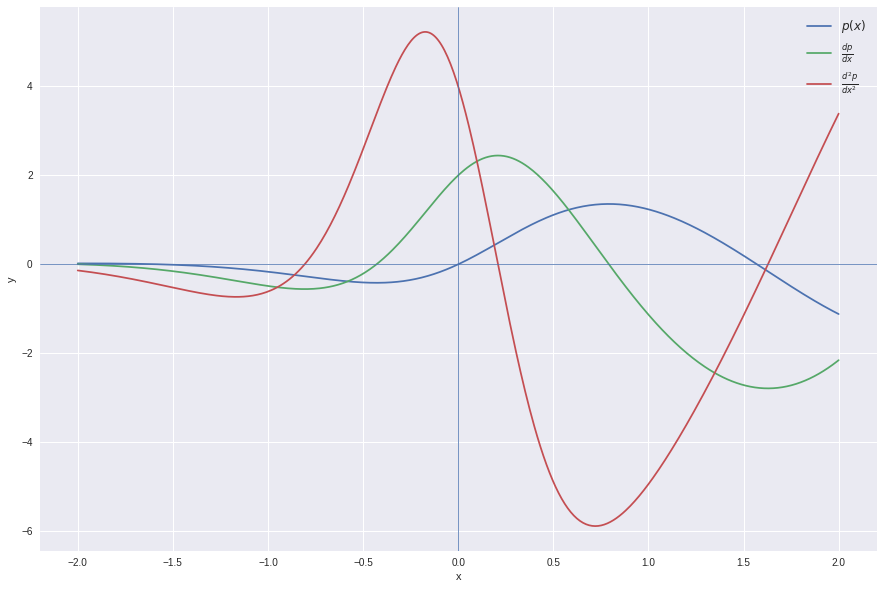

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(X,P(X),label='$p(x)$')
plt.plot(X,DP(X),label='$\\frac{dp}{dx}$')
plt.plot(X,D2P(X),label='$\\frac{d^2p}{dx^2}$')

plt.axhline(y=0,lw=0.75)
plt.axvline(x=0,lw=0.75)

plt.legend(fontsize=12)

plt.xlabel('x')
plt.ylabel('y')

plt.show()

---

## __Exercie 3__

(a) Use __sym.diff()__ to find the __first__ and __third__ derivatives of the function __q__ with respect to $t$, which were defined in __Exercise 2.2__

(b) Use __sym.lambdify()__ create numpy versions of these derivatives called __DQ__ and __D3Q__

(c) Plot the functions __Q__, __DQ__ and __D3Q__ over the interval __T=[-5,5]__ already defined in __Exercise 2.2__

---
---

# Section 4 - Rules of Differentation

* We already have tables of derivatives to calcualte derivatives symbolically.

* We would like to confirm some of these rules using __sym.diff()__ for a number of differenti functions.

## Example 4

* Use the function __sym.diff()__ to find the $1^{\rm st}$, $2^{\rm nd}$ amd $3^{\rm rd}$ deerivatives of the following functions:

(a) $f_{1} = x^4 +x^{-\frac{3}{2}}$

In [ ]:
f1 = x**4 +x**(-3/2)
df1 = sym.diff(f1,(x,1))
d2f1 = sym.diff(f1,(x,2))
d3f1 = sym.diff(f1,(x,3))

In [ ]:
f1

x**(-1.5) + x**4

In [ ]:
df1

-1.5*x**(-2.5) + 4*x**3

In [ ]:
d2f1

3.75*x**(-3.5) + 12*x**2

In [ ]:
d3f1

-13.125*x**(-4.5) + 24*x

(b) $f_{2} = e^{-3x} + \sin(2x)$

In [ ]:
f2=sym.exp(-3*x)+sym.sin(2*x)
df2 = sym.diff(f2,(x,1))
d2f2 = sym.diff(f2,(x,2))
d3f2 = sym.diff(f2,(x,3))

In [ ]:
f2

sin(2*x) + exp(-3*x)

In [ ]:
df2

2*cos(2*x) - 3*exp(-3*x)

In [ ]:
d2f2

-4*sin(2*x) + 9*exp(-3*x)

In [ ]:
d3f2

-(8*cos(2*x) + 27*exp(-3*x))

(c) $f_{3} = \tan(4x) + \tan^{-1}\left(\frac{x}{3}\right)$

In [ ]:
f3=sym.tan(4*x)+sym.atan(x/3)
df3 = sym.diff(f3,(x,1))
d2f3 = sym.diff(f3,(x,2))
d3f3 = sym.diff(f3,(x,3))

In [ ]:
f3

tan(4*x) + atan(x/3)

In [ ]:
df3

4*tan(4*x)**2 + 4 + 1/(3*(x**2/9 + 1))

In [ ]:
d2f3

2*(-3*x/(x**2 + 9)**2 + 16*(tan(4*x)**2 + 1)*tan(4*x))

In [ ]:
d3f3

2*(12*x**2/(x**2 + 9)**3 + 64*(tan(4*x)**2 + 1)**2 + 128*(tan(4*x)**2 + 1)*tan(4*x)**2 - 3/(x**2 + 9)**2)

### The $\arctan()$ Function

* Another name for the $\tan^{-1}()$ function is $\arctan()$. 


* This is called from the sympy library as __sym.atan()__, the prefix __a__ is used to indicate __arc__.


* Similarly the symbolic $\sin^{-1}()$ and $\cos^{-1}()$ functions are called using __sym.asin()__ and __sym.acos()__.

---

## __Exercie 4__

* Use the __sym.diff()__ function the find the $1^{\rm st}$, $3^{\rm rd}$ and $5^{\rm th}$ derivatives of the following functions:

(a) $g_1 = \sin^{-1}\left(\frac{t}{2}\right) + \ln(3t)$

(b) $g_{2} = \frac{1}{t^4} - t^{\frac{5}{4}}$

(c) $g_{3} = e^{t} + \tan(2t) + \cos(3t)$